# Lab 2
<ol>
    <li><a href="#sample">Sampling</a></li>
        <ul><li><a href="#simple">1.1 Simple random sampling</a></li>
        <li><a href="#stratified">1.2 Stratified random sampling</a></li>
        <li><a href="#cluster">1.3 Cluster sampling</a></li>
    </ul>
    <li><a href="#binning">Binning</a></li>
        <ul>
            <li><a href='#depth'>2.1 Equal depth(Frequancy)</a></li>
            <li><a href='#width'>2.2 Equal width</a></li>
        </ul>
    <li><a href="#corr">Correlation Analysis</a></li>
</ol>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('customers.csv')

In [ ]:
df.head(2)

In [ ]:
df.describe()

<a id='sample'></a>
# 1. Sampling

<a id="simple"></a>
## 1.1 Simple random sampling

# Complete
**pick the Age column and choose a random sample of 500 elements then plot the sample**

In [ ]:
age = df['Age']
len(age)

In [ ]:
age

In [ ]:
sample = age.sample(500)
sample.plot.hist(figsize=(15,10));

**plot the Age original column and see the difference in both distributions**

In [ ]:
# Your code here



**"Random sample usually does not represent the whole dataset"**

<a id="stratified"></a>
## 1.2 Stratified random sampling
* Stratified random sampling is a method of sampling that involves the division of a population into smaller sub-groups known as strata.


* Stratified random sampling is also called proportional random sampling or quota random sampling.

[Stratified random sampling](https://www.investopedia.com/terms/stratified_random_sampling.asp)

# Complete
**Apply the stratified random sampling on the views column with 5 stratified samples and 500 elements in total**

In [ ]:
minn = age.min()
maxx = age.max()
diff = (age.max() - age.min())
print('minimum = ', minn)
print('maximum = ', maxx)
print('difference = ', diff)

In [ ]:
m = age.min()
l = (age.max() - age.min())//5 # length of each interval
g1 = views[views < m+l ] # add l to m; beacause we start from m not zero.
# Your code here




In [ ]:
print('length of each interval', l)
print("g1 [26:35] = ", len(g1))
print("g2 [35:44] = ", len(g2))
print("g3 [44:53] = ", len(g3))
print("g4 [53:62] = ", len(g4))
print("g5 [62:...] = ", len(g5))

In [ ]:
groups = {'G1':len(g1), 'G2':len(g2), 'G3':len(g3), 'G4':len(g4), 'G5':len(g5)}
groups_df = pd.DataFrame(groups.values(), columns=['count'], index=groups.keys())
groups_df

In [ ]:
groups_df.plot(kind='barh');

In [ ]:
sample_size = 500
total = len(df) # 10127
sample_percentage = round(sample_size / total,3) # 36
# 0.049 * 735 = 36
s1 = 

# 0.049 * 3440 = 169
s2 = 

# 0.049 * 4535 = 222
s3 = 

# 0.049 * 2085 = 102
s4 = 

# 0.049 * 312 = 15
s5 = 

s = s1.append([s2, s3, s4, s5])
s.plot.hist(figsize=(15,5));

In [ ]:
print("s1= ",len(s1))
print("s2= ",len(s2))
print("s3= ",len(s3))
print("s4= ",len(s4))
print("s5= ",len(s5))

In [ ]:
samples = {'S1':len(s1), 'S2':len(s2), 'S3':len(s3), 'S4':len(s4), 'S5':len(s5)}
samples_df = pd.DataFrame(samples.values(), columns=['count'], index=samples.keys())
samples_df

In [ ]:
samples_df.plot(kind='barh');

<a id="cluster"></a>
## 1.3 Cluster sampling
1. In cluster sampling, researchers divide a population into smaller groups known as clusters.  They then randomly select among these clusters to form a sample.


2. Cluster sampling is a method of probability sampling that is often used to study large populations, particularly those that are widely geographically dispersed. Researchers usually use pre-existing units such as schools or cities as their clusters.

[Cluster sampling](https://www.scribbr.com/methodology/cluster-sampling/)

## How to cluster sample
1. Define your population
2. Divide your sample into clusters
3. Randomly select clusters to use as your sample
4. Collect data from the sample

In [ ]:
# 1. Define your population
df.head()

In [ ]:
#df.loc[:,df.dtypes=='int64'].drop('CLIENTNUM', axis=1)
#df.loc[:,df.dtypes=='float64']
pd.merge(left=df.loc[:,df.dtypes=='int64'].drop('CLIENTNUM', axis=1), right=df.loc[:,df.dtypes=='float64'], on=df.index)

In [ ]:
from sklearn.cluster import KMeans
X = pd.merge(left=df.loc[:,df.dtypes=='int64'].drop('CLIENTNUM', axis=1), right=df.loc[:,df.dtypes=='float64'], on=df.index).values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
df['Segmentation'] = kmeans.labels_

In [ ]:
df

In [ ]:
# 2. Divide your sample into clusters
df.Segmentation.unique()

In [ ]:
# 3. Randomly select clusters to use as your sample
sample = df[df.Segmentation.isin(['1', '3'])].index
sample

In [ ]:
# 4. Collect data from the sample
df[df.index.isin(sample)]

<a id='binning'></a>
# 2. Binning
<img src="https://miro.medium.com/max/1400/1*NHNyiD5eDa57trux7dvW0g.png">

<a id="depth"></a>
## 2.1 Equal depth (or frequency) binning
#### In equal-frequency binning we divide the range [A, B] of the variable into intervals that contain (approximately) equal number of points; equal frequency may not be possible due to repeated values.

In [ ]:
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(df.Age, equalObs(df.Age, 3), edgecolor='black')
plt.show()

<a id='width'></a>
## 2.2 Equal width
#### The simplest binning approach is to partition the range of the variable into k equal-width intervals. The interval width is simply the range [A, B] of the variable divided by k,

In [ ]:
n, bins, patches = plt.hist(df.Age, edgecolor='black', bins=4)
plt.show()

<a id="corr"></a>
# 3. Correlation coofficient
A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables.

In other words, it reflects how similar the measurements of two or more variables are across a dataset.

[Correlation coofficient](https://www.scribbr.com/statistics/correlation-coefficient)

In [ ]:
df[df.Avg_Utilization_Ratio==0]

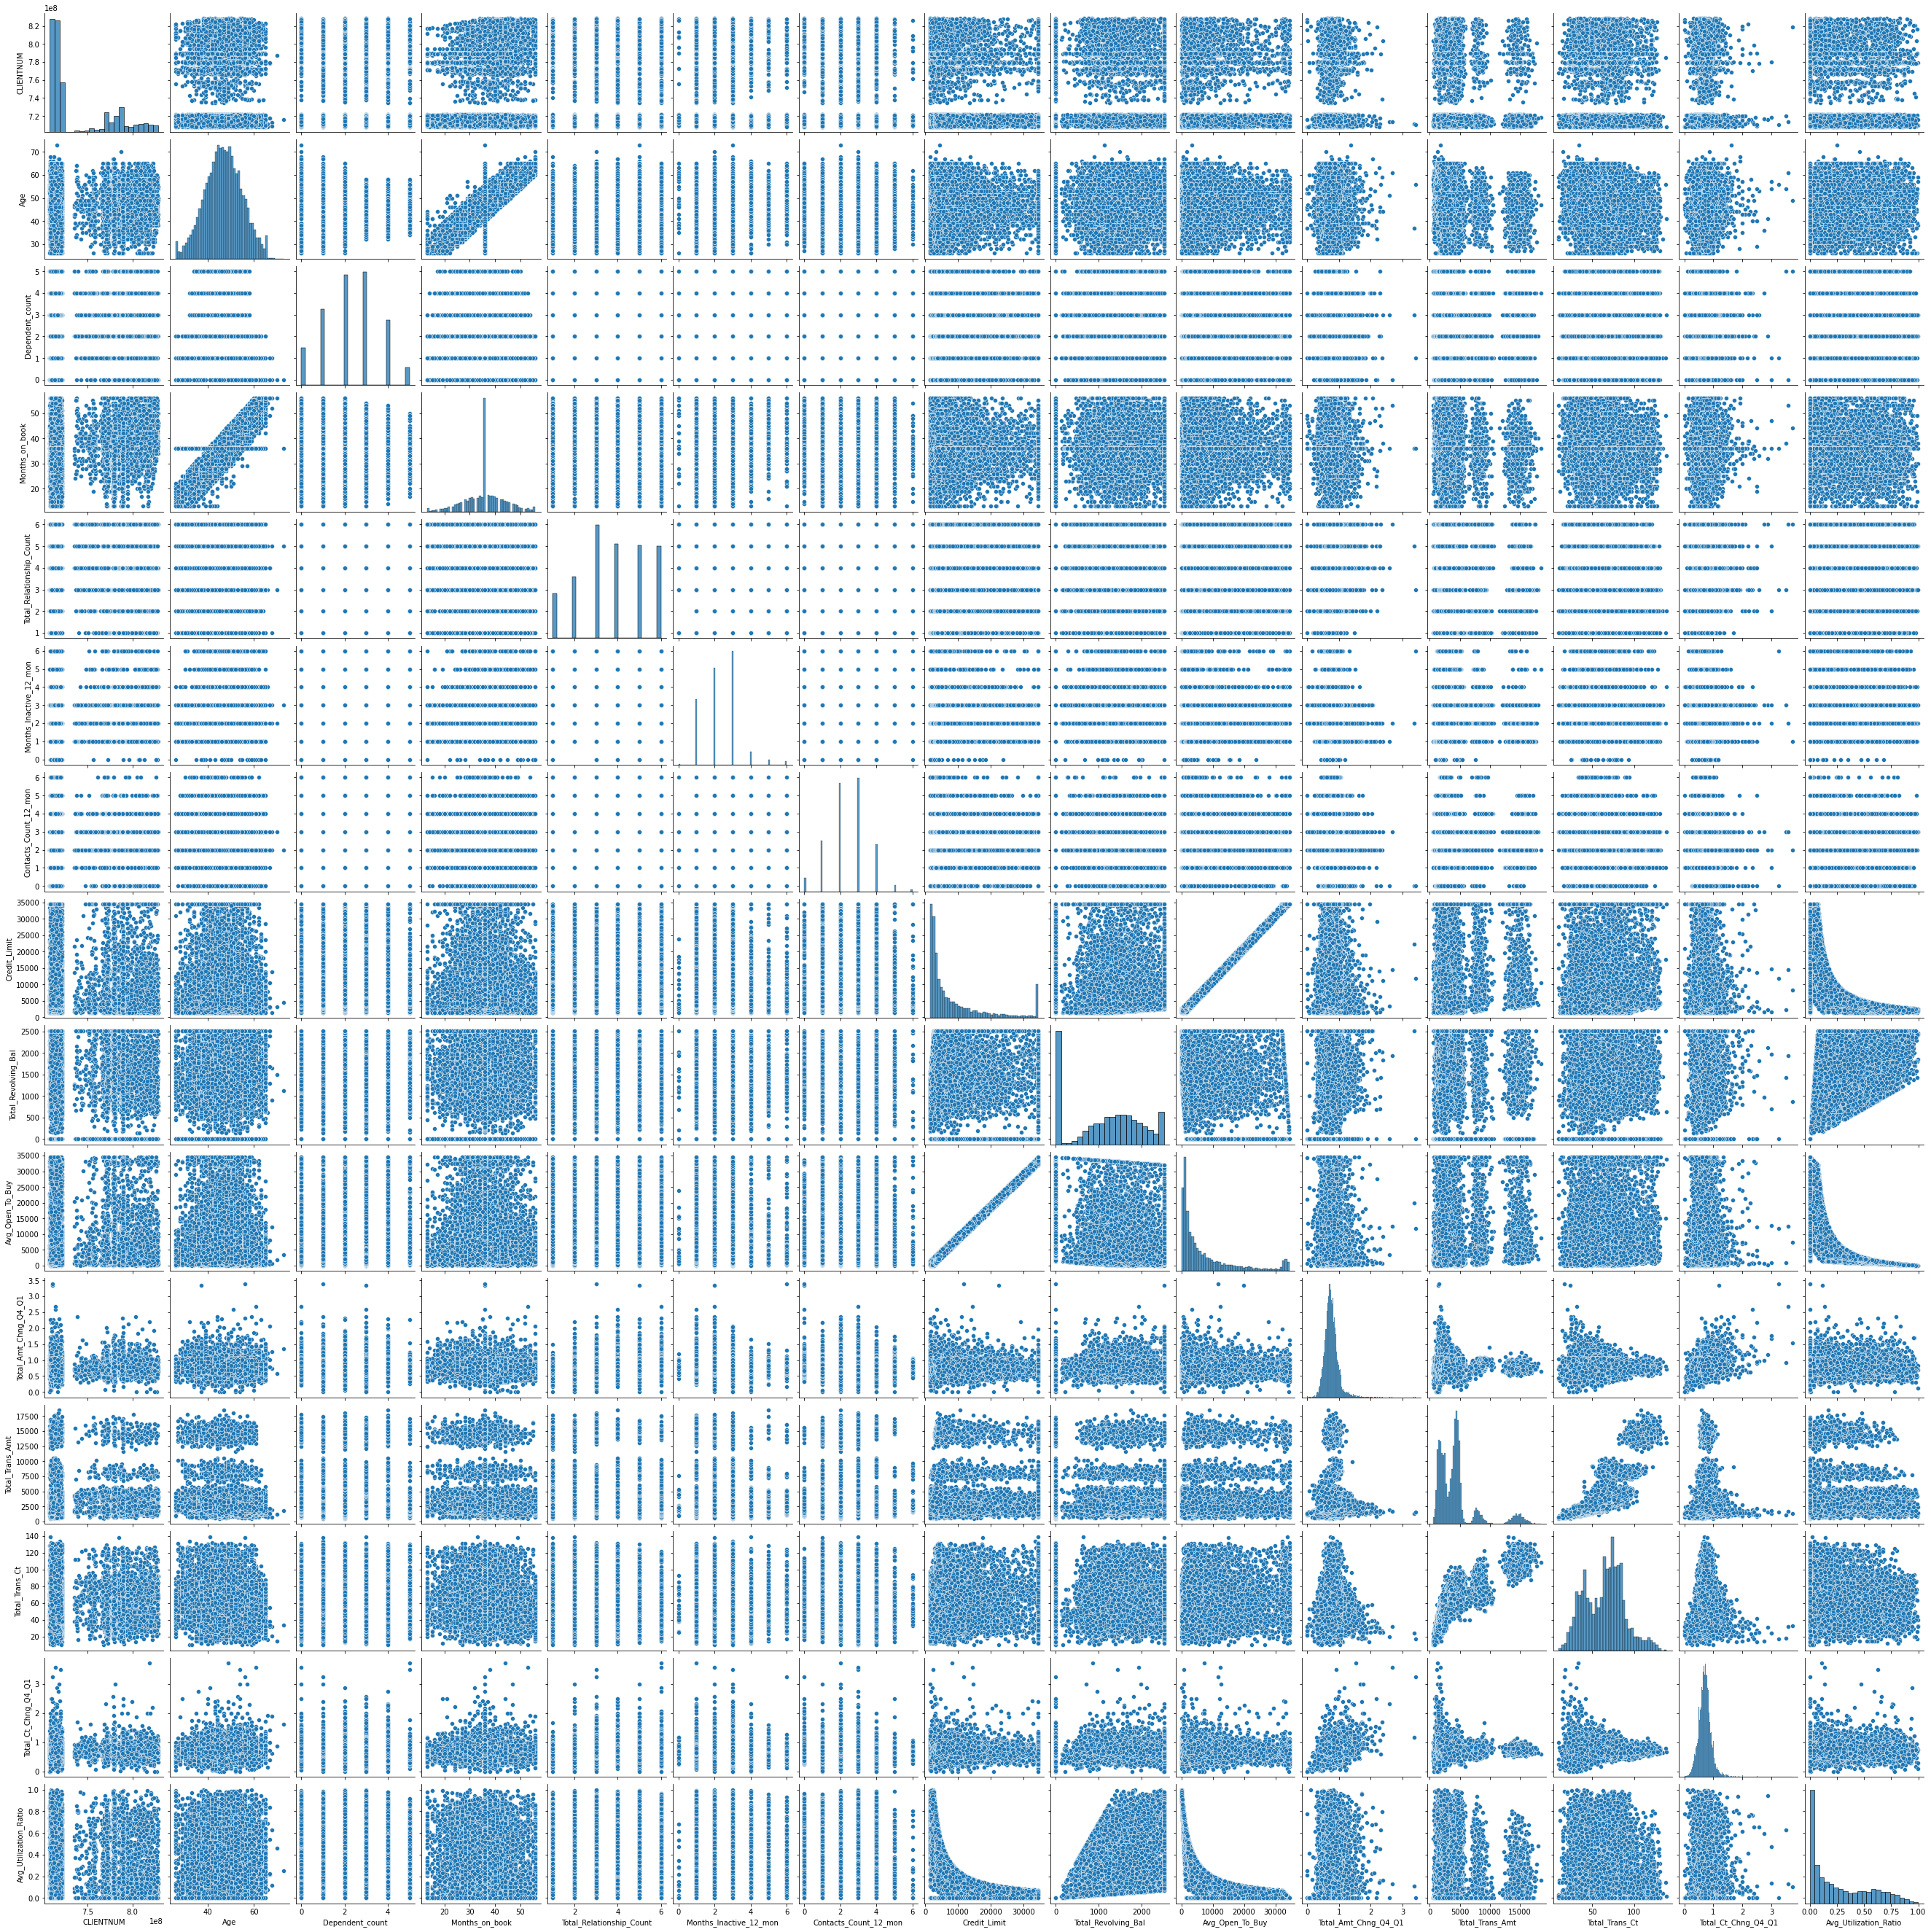

In [6]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.columns

In [ ]:
df.plot.scatter(x = 'Credit_Limit', y = 'Avg_Open_To_Buy');

<img src="https://i.ytimg.com/vi/qwqgoHv9tY0/maxresdefault.jpg">

# Task 5
**Calculate the correlation between the views  and comments column**

In [ ]:
a_mean = 
b_mean = 
n = 
print(a_mean, b_mean)
numerator = sum([(a - a_mean) *(b - b_mean) for a, b in zip(df['Credit_Limit'], df['Avg_Open_To_Buy'])])
denominator = 
cov = 
corr = 

In [ ]:
df[['Credit_Limit', 'Avg_Open_To_Buy']]

In [ ]:
corr # Range from -1 to 1

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['Credit_Limit'], df['Avg_Open_To_Buy']) 
#Returns
#r : float
    #Pearson's correlation coefficient.
#p-value : float
    #Two-tailed p-value.